# TO RUN
1. Make sure you installed all the dependencies
2. open **'init_notebook.py'** and change the **projectFolder** to the src folder of the repository.
3. In the following cell change the dataDir to the data directory of the InD dataset

In [1]:
# dataDir = "G:AV datasets/inD-dataset-v1.0/data/"
dataDir = "E:/Datasets/inD-dataset-v1.0/data/"

In [2]:
exec(open('init_notebook.py').read())

current working dirD:\AV\DataSetExploration\drone-dataset-tools\src


In [3]:
%load_ext autoreload
%autoreload 2

In [6]:
import logging
logging.basicConfig(level=logging.INFO)
from loguru import logger
logger.remove()
logger.add(sys.stdout, format="{level} {message}", filter="my_module", level="INFO")

from extractors.loader import Loader

In [7]:
loader = Loader(dataDir, 'inD')

# LocationData - for aggregation

**get all the unique crossing ids**
```
loc2data = loader.getLocationData(2)
loc2data.getUniqueCrossingIds()
```
**get all the crossing data by scene config**
```
loc2data = loader.getLocationData(2, useSceneConfigToExtract=True)
crossingDf = loc2data.getCrossingDf()
```

In [8]:
loc2data = loader.getLocationData(2, useSceneConfigToExtract=True)

INFO:root:recordingIds: [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
clipping trajectories for scene # 40: 100%|██████████| 207/207 [00:27<00:00,  7.59it/s]


In [9]:
loc2data.summary()

{'#original frameRate': 25.0,
 '#crossing trajectories': 1348,
 '#scene trajectories': 1557,
 'scene#10': 609,
 'scene#11': 8,
 'scene#20': 174,
 'scene#21': 38,
 'scene#22': 53,
 'scene#30': 470,
 'scene#31': 17,
 'scene#40': 188}

In [10]:
crossingDf = loc2data.getCrossingDf()

# Saving and Loading pre--processed Location data

In [11]:
loc2data.saveCrossingDf("../data") # only crossing dataframe

In [12]:
loc2data.save("../data") # whole thing as a dill object

In [13]:
from extractors.LocationData import LocationData
loc2dataFromFile = LocationData.load("../data/location-2")

# Validate if there are trajectories not captured by the scene-based extractor

In [14]:
from tools.TrajectoryUtils import TrajectoryUtils
from tools.TrajectoryVisualizer import TrajectoryVisualizer
import matplotlib.pyplot as plt
import numpy as np
visualizer = TrajectoryVisualizer(loader)

In [15]:
# visualizer.showLocationCrossingTracks(loc2data)

In [16]:
sceneData = loc2dataFromFile.getSceneCrossingData(10, 10, 5, refresh=False)
# sceneDf = loc2data.getSceneCrossingDf('10', 0, 0)

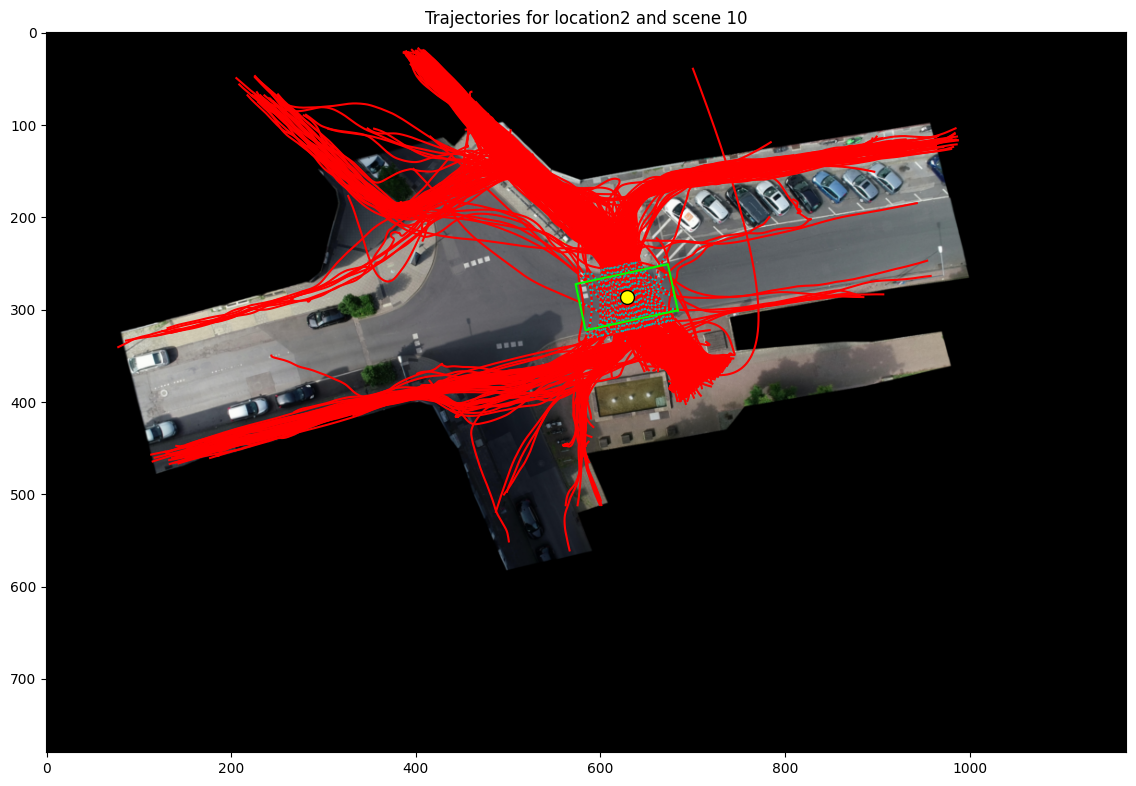

In [17]:
visualizer.showLocationSceneData(sceneData)

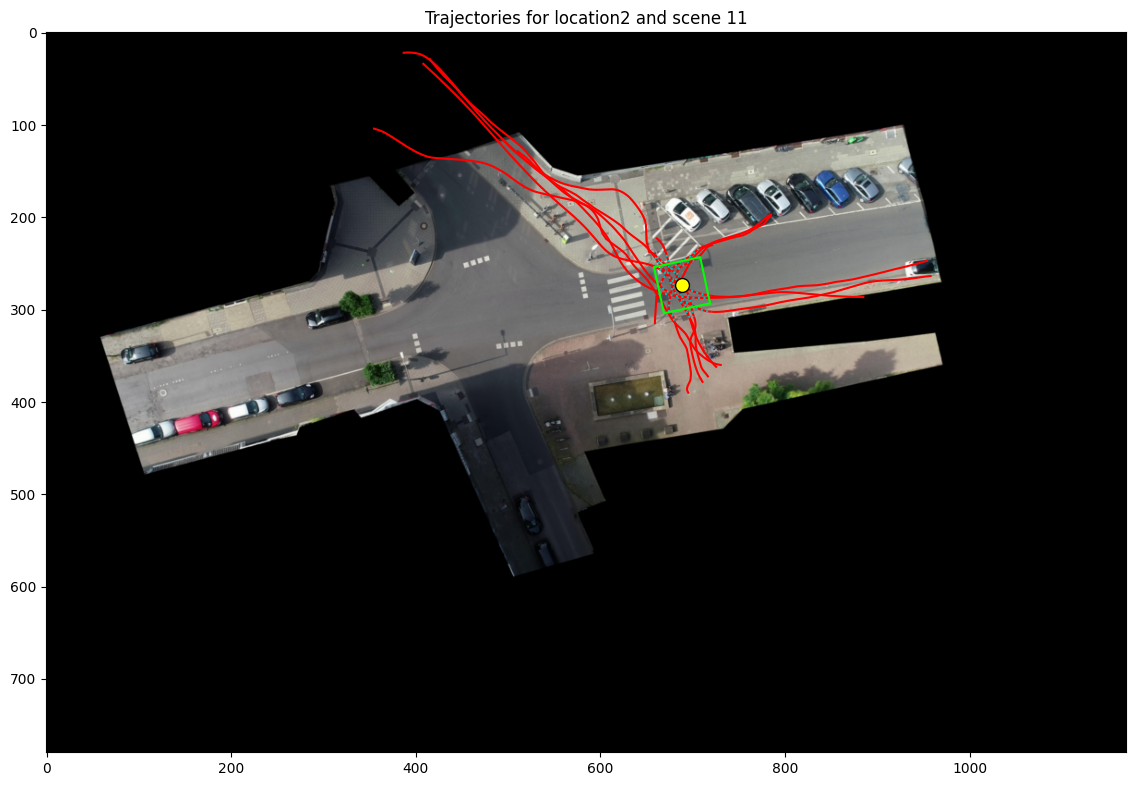

In [18]:
scene11Data = loc2data.getSceneCrossingData(11, 10, 6, refresh=False)
visualizer.showLocationSceneData(scene11Data)

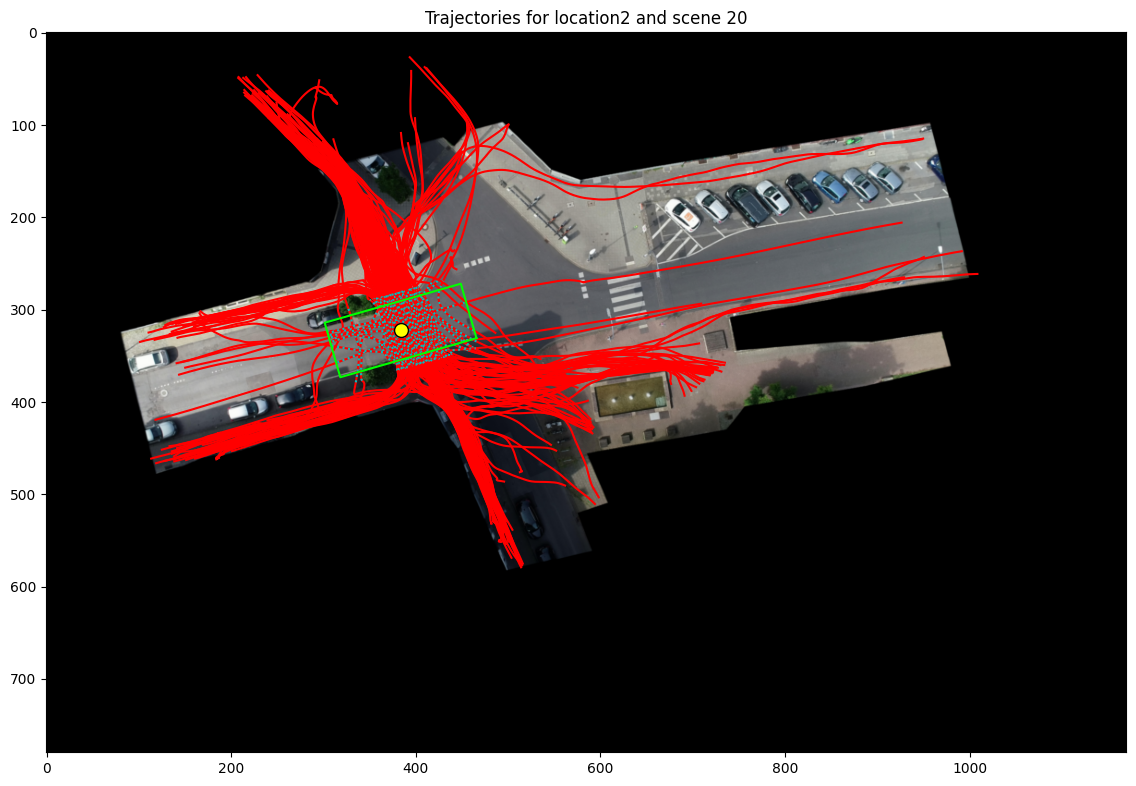

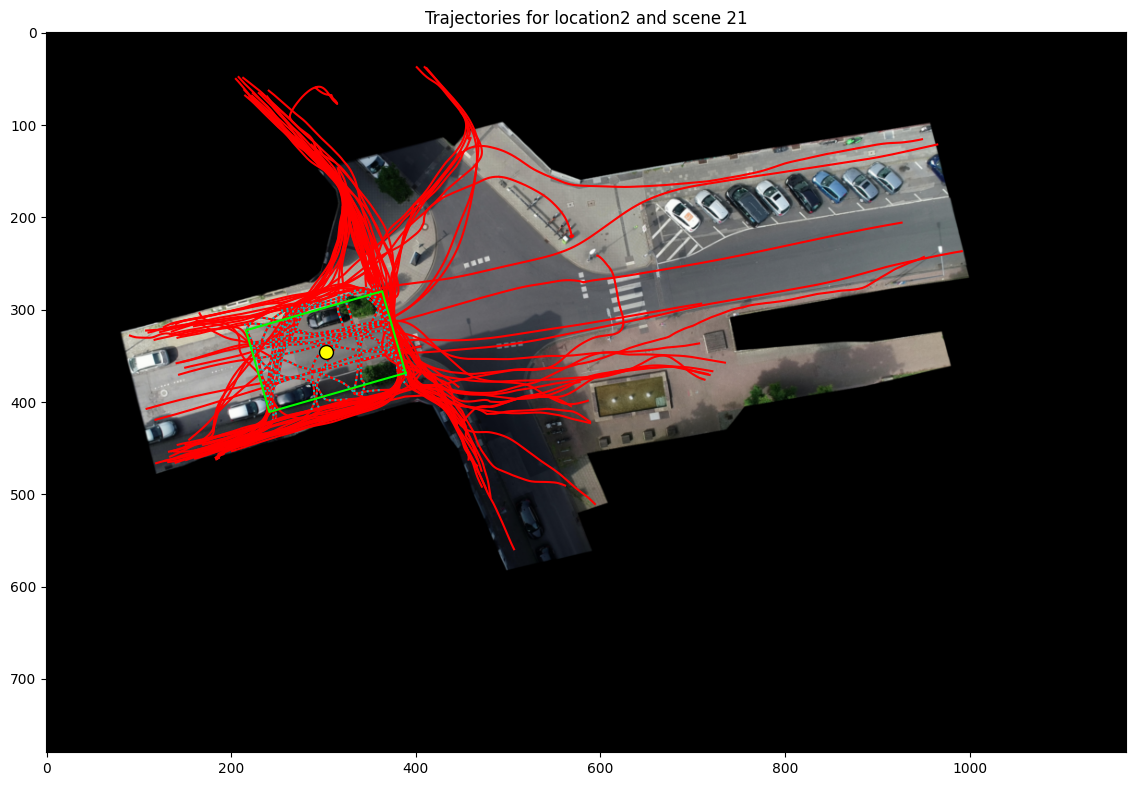

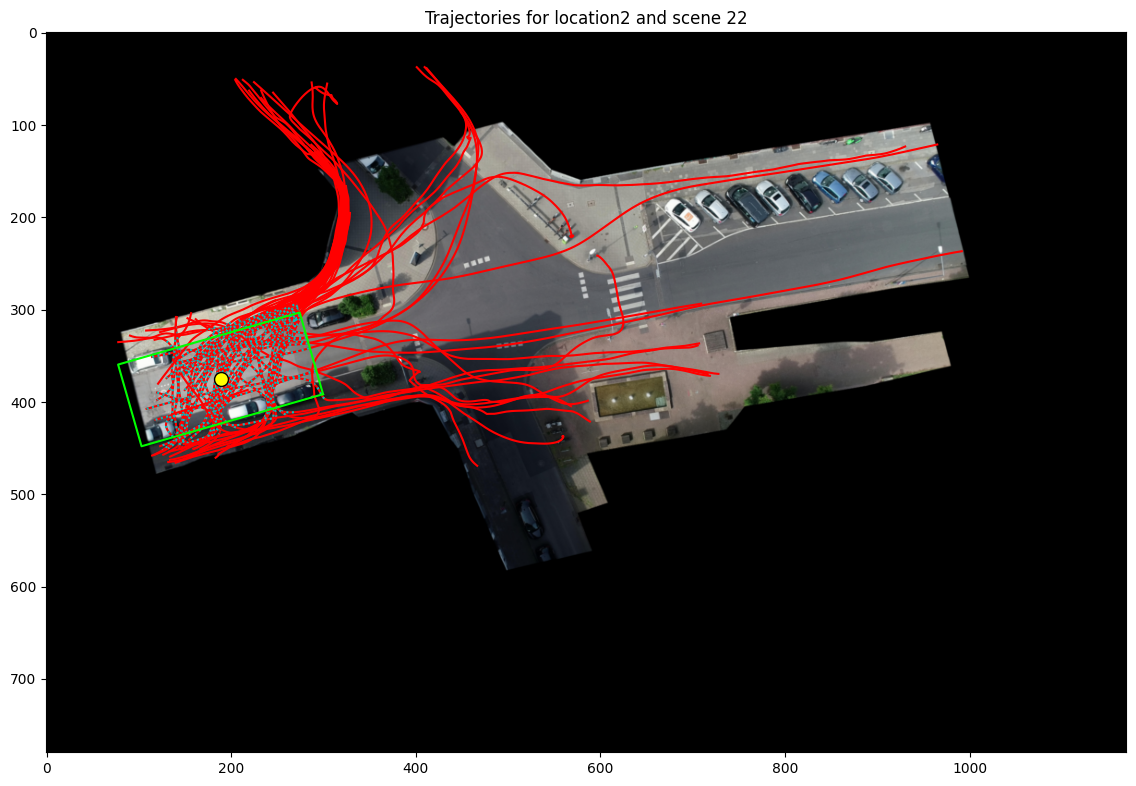

In [19]:
scene20Data = loc2data.getSceneCrossingData(20, 10, 6, refresh=False)
visualizer.showLocationSceneData(scene20Data)

scene21Data = loc2data.getSceneCrossingData(21, 20, 9, refresh=False)
visualizer.showLocationSceneData(scene21Data, onlyClipped=False)

scene22Data = loc2data.getSceneCrossingData(22, 10, 6, refresh=False)
visualizer.showLocationSceneData(scene22Data)

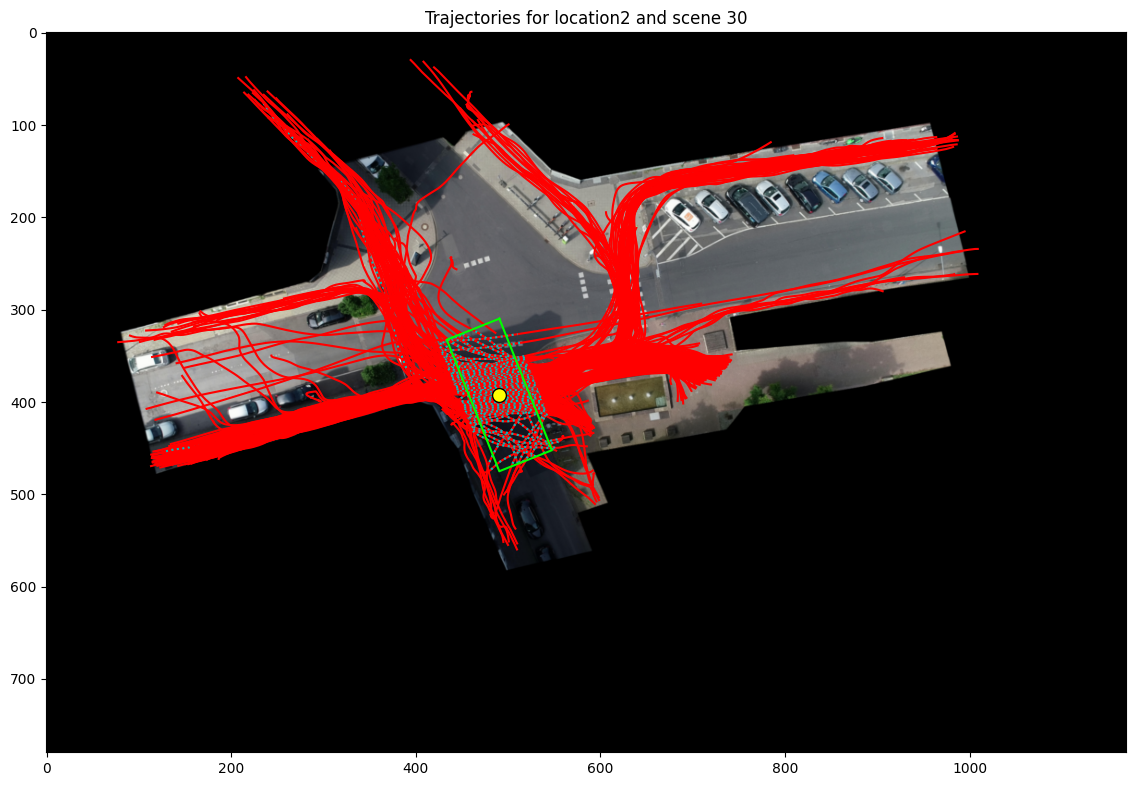

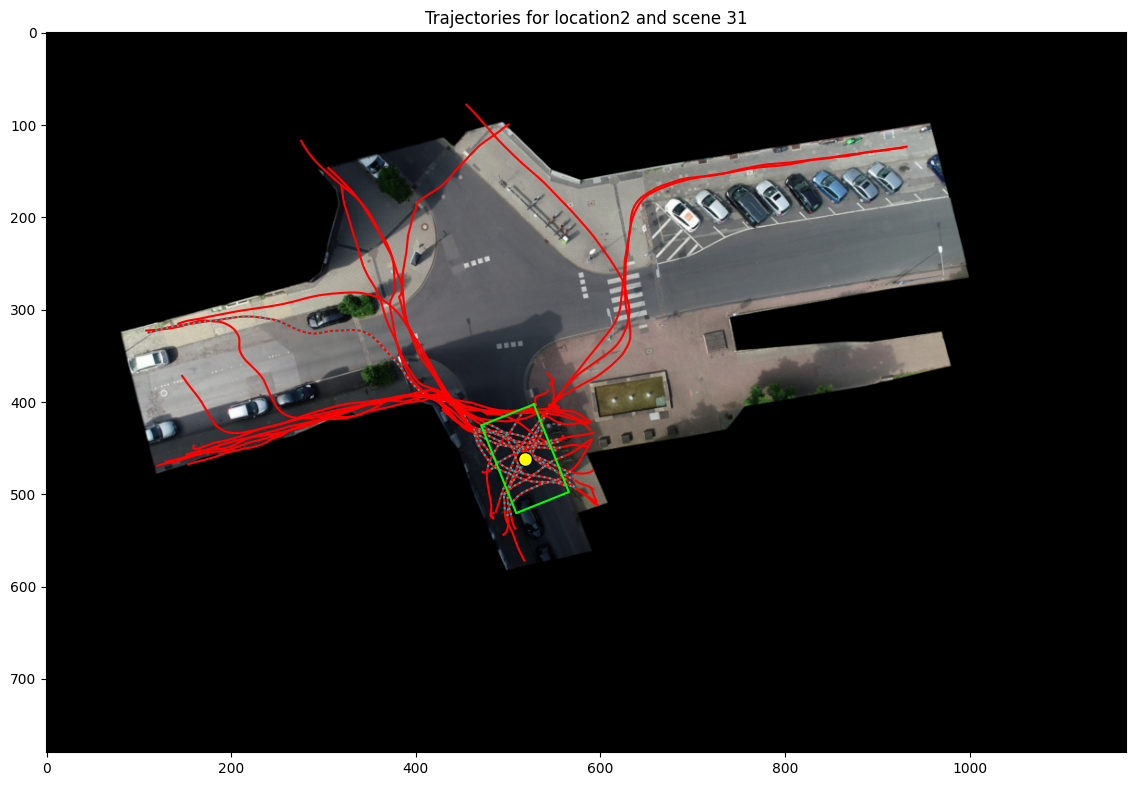

In [20]:
scene30Data = loc2data.getSceneCrossingData(30, 10, 6, refresh=False)
visualizer.showLocationSceneData(scene30Data)

scene31Data = loc2data.getSceneCrossingData(31, 10, 6, refresh=False)
visualizer.showLocationSceneData(scene31Data)

In [ ]:
scene40Data = loc2data.getSceneCrossingData(40, 6, 6, refresh=False)
visualizer.showLocationSceneData(scene40Data)